<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/Zemlyakov-Serj-folder/%5CZemlyakov%20Serj%5C%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_1_%D0%9F%D1%80%D0%BE%D1%84%D0%BF%D0%B0%D1%82%D0%BE%D0%BB%D0%BE%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# Работа с массивами данных
import numpy as np 

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

!pip install tensorflow-addons

import tensorflow_addons as tfa

from tensorflow_addons.metrics import F1Score

%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Mount Google Drive
import os
from google.colab import drive

drive.mount('/content/drive')
!pwd
!ls



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
drive  sample_data


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/internsheep1/profpat_1.csv')
# df

<ipython-input-2-fc7b980cb21a>:2: DtypeWarning: Columns (24,25,26,43,44,45,46,47,48,54,55,56,57,58,59,60,61,62,63,64,65,77,78,79,81,84,85,86,87,88,89,90,91,92,108,109,112,113,120,121,122,123,124,125,126,127,162,163,164,168,169,170,171,172,173,174,195,196,201,202,203,204,205,206,207,208,221,222,223,228,229,230,252,253,258,259,260,261,262,263,264,265,266,267,270,271,272,273,276,277,278,279,282,283,284,285,286,287,293,294,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,363,364,365,366,367,370,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,418,419,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,470,471,472,483,484,485,486,491,492,514,515,549,550,551,552,553,554,555,564,565,578,579,580,581,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,6

In [ ]:
# Вывод количества и числа признаков
print(df.shape)

(1982, 4587)


In [ ]:
dffix1 = df.dropna(axis=1, how='all')

# Вывод количества и числа признаков
print(dffix1.shape)


(1982, 3703)


In [ ]:
# dffix1.to_excel('ppfix1.xlsx', index=False)

In [ ]:
dffix2 = dffix1[dffix1['ЗаключениеМК'].isin(['Годен',
                                    'ГоденСКоррекциейЗрения',
                                    'ВременноНегоден',
                                    'НуждаетсяВДообследованииИЛечении',
                                    'ОграниченноГоден',
                                    'ГоденБезРаботНаВысотах'])]
print(dffix2.shape)                                    

(1571, 3703)


In [ ]:
dffix2.loc[dffix2['ЗаключениеМК'] == 'ВременноНегоден', 'ЗаключениеМК'] = 'Негоден'
dffix2.loc[dffix2['ЗаключениеМК'] == 'НуждаетсяВДообследованииИЛечении', 'ЗаключениеМК'] = 'Негоден'
dffix2.loc[dffix2['ЗаключениеМК'] == 'ГоденСКоррекциейЗрения', 'ЗаключениеМК'] = 'ОграниченноГоден'
dffix2.loc[dffix2['ЗаключениеМК'] == 'ГоденБезРаботНаВысотах', 'ЗаключениеМК'] = 'ОграниченноГоден'

In [ ]:
dffix2.ЗаключениеМК.value_counts()

Годен               1434
ОграниченноГоден     126
Негоден               11
Name: ЗаключениеМК, dtype: int64

In [ ]:
# dffix2.to_excel('ppfix2.xlsx', index=False)

In [ ]:
dffix2.rename(columns = {'Вредные Факторы':'Вредность'}, inplace = True )

<ipython-input-8-81fbedcc2c8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix2.rename(columns = {'Вредные Факторы':'Вредность'}, inplace = True )


In [ ]:
dffix2.columns.tolist()

['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'Диспансерная Группа',
 'ДиспансернаяГруппаПредставление',
 'Вредность',
 'ЛабораторныеИсследования1_ДокументПрием',
 'ЛабораторныеИсследования1_ДатаПриема',
 'ЛабораторныеИсследования1_Салон',
 'ЛабораторныеИсследования1_СалонПредставление',
 'ЛабораторныеИсследования1_Специализация',
 'ЛабораторныеИсследования1_СпециализацияПредставление',
 'ЛабораторныеИсследования1_ХР_Рекомендация1',
 'ЛабораторныеИсследования1_ХР_Рекомендация1Представление',
 'ЛабораторныеИсследования1_ХР_Рекомендация2',
 'ЛабораторныеИсследования1_ОАК_Значение',
 'ЛабораторныеИсследования1_ОАК_ЗначениеПредставление',
 'ЛабораторныеИсследования1_Биохимия_Значение',
 'ЛабораторныеИсследования1_Биохимия_Зна

In [ ]:
dffix4_simple = dffix2[['ЗаключениеМК',
                        'КлиентДатаРождения',
                        'Профессия',
                        'Вредность',
 'Психиатрия Наркология1 МКБ101',
#  'Психиатрия Наркология1 Диагноз Представление1',
 'Офтальмология1_МКБ101',
#  'Офтальмология1_ДиагнозПредставление1',
 'Оториноларингология1_МКБ101',
#  'Оториноларингология1_ДиагнозПредставление1',
 'Гинекология1_МКБ101',
#  'Гинекология1_ДиагнозПредставление1',
 'Стоматология1_МКБ101',
#  'Стоматология1_ДиагнозПредставление1',
 'Дерматовенерология1_МКБ101',
#  'Дерматовенерология1_ДиагнозПредставление1',
 'Неврология1_МКБ101',
#  'Неврология1_ДиагнозПредставление1',
 'Терапия1_МКБ101',
#  'Терапия1_ДиагнозПредставление1',
 'Хирургия1_МКБ101',
#  'Хирургия1_ДиагнозПредставление1',
 'Офтальмология1_МКБ102',
#  'Офтальмология1_ДиагнозПредставление2',
 'Терапия2_МКБ101',
#  'Терапия2_ДиагнозПредставление1',
]]

print (dffix4_simple.shape)

(1571, 15)


In [ ]:
dffix4_simple.to_excel('ppfix4.xlsx', index=False)

In [ ]:
pd.options.display.max_columns = None
dffix4_simple


,ЗаключениеМК,КлиентДатаРождения,Профессия,Вредность,Психиатрия Наркология1 МКБ101,Офтальмология1_МКБ101,Оториноларингология1_МКБ101,Гинекология1_МКБ101,Стоматология1_МКБ101,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Терапия1_МКБ101,Хирургия1_МКБ101,Офтальмология1_МКБ102,Терапия2_МКБ101
0,Годен,10/24/76 0:00,Ведущий специалист по организации обуения,11.4,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Годен,11/18/87 0:00,Ведущий специалист,4.2.5,Z00.0,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,I11.9,NaN,NaN,NaN
2,ОграниченноГоден,9/8/85 0:00,Главный менеджер,4.2.5,Z00.0,H52.1,NaN,NaN,NaN,Z00.0,NaN,Z00.0,NaN,NaN,NaN
3,Годен,4/25/88 0:00,Главный специалист,11.1,NaN,Z00.0,Z00.0,NaN,Z00.0,NaN,Z00.0,Z00.0,NaN,NaN,NaN
4,ОграниченноГоден,4/17/84 0:00,Старший специалист,11.1,NaN,H52.2,Z00.0,NaN,Z00.0,NaN,Z00.0,Z00.0,Z00.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Годен,12/29/93 0:00,Инженер,"4.4,4.5,6.1",Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,Z00.0,NaN,NaN
1962,Годен,7/10/89 0:00,Начальник лаборатории,4.4,Z00.0,NaN,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,NaN,NaN,NaN
1972,Годен,2/4/87 0:00,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,Z00.0,NaN,NaN
1973,Годен,2/4/93 0:00,Приемщик вагонов в депо,"4.2.5,6.1",Z00.0,Z00.0,Z00.0,NaN,NaN,NaN,Z00.0,Z00.0,Z00.0,NaN,NaN


In [ ]:

# concatenating the columns
dffix4_simple['Свод_МКБ'] = (dffix4_simple['Психиатрия Наркология1 МКБ101'].map(str) + ','
 + dffix4_simple['Офтальмология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Оториноларингология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Гинекология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Стоматология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Дерматовенерология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Неврология1_МКБ101'].map(str)+ ','
 + dffix4_simple['Терапия1_МКБ101'].map(str)+ ','
 + dffix4_simple['Хирургия1_МКБ101'].map(str)+ ','
 + dffix4_simple['Офтальмология1_МКБ102'].map(str)+ ','
 + dffix4_simple['Терапия2_МКБ101'].map(str))
 



<ipython-input-62-faf34a43eb90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix4_simple['Свод_МКБ'] = (dffix4_simple['Психиатрия Наркология1 МКБ101'].map(str) + ','


In [ ]:
dffix5_simple = dffix4_simple[['ЗаключениеМК',
                        'КлиентДатаРождения',
                        'Профессия',
                        'Вредность',
                        'Свод_МКБ',
]]

print (dffix5_simple.shape)
dffix5_simple

(1571, 5)


,ЗаключениеМК,КлиентДатаРождения,Профессия,Вредность,Свод_МКБ
0,Годен,10/24/76 0:00,Ведущий специалист по организации обуения,11.4,"Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan,nan,nan,..."
1,Годен,11/18/87 0:00,Ведущий специалист,4.2.5,"Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,I11.9,nan,..."
2,ОграниченноГоден,9/8/85 0:00,Главный менеджер,4.2.5,"Z00.0,H52.1,nan,nan,nan,Z00.0,nan,Z00.0,nan,na..."
3,Годен,4/25/88 0:00,Главный специалист,11.1,"nan,Z00.0,Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,nan,..."
4,ОграниченноГоден,4/17/84 0:00,Старший специалист,11.1,"nan,H52.2,Z00.0,nan,Z00.0,nan,Z00.0,Z00.0,Z00...."
...,...,...,...,...,...
1961,Годен,12/29/93 0:00,Инженер,"4.4,4.5,6.1","Z00.0,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00...."
1962,Годен,7/10/89 0:00,Начальник лаборатории,4.4,"Z00.0,nan,Z00.0,nan,nan,nan,Z00.0,Z00.0,nan,na..."
1972,Годен,2/4/87 0:00,"Инженер по бурению 1 категории, непосредственн...",3.1.8.2,"Z00.0,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00...."
1973,Годен,2/4/93 0:00,Приемщик вагонов в депо,"4.2.5,6.1","Z00.0,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00...."


In [ ]:
dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'Негоден', 'ЗаключениеМК'] = 0 
dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'ОграниченноГоден', 'ЗаключениеМК'] = 1
dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'Годен', 'ЗаключениеМК'] = 2

<ipython-input-64-bf05980aa8e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'Негоден', 'ЗаключениеМК'] = 0
<ipython-input-64-bf05980aa8e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix5_simple.loc[dffix5_simple['ЗаключениеМК'] == 'ОграниченноГоден', 'ЗаключениеМК'] = 1
<ipython-input-64-bf05980aa8e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffix5_simple.loc[dffix

In [ ]:
# Настройка номеров столбцов
# Дальнейшие вычисления не будут зависеть от порядка столбцов в таблице

COL_DB    = dffix5_simple.columns.get_loc('КлиентДатаРождения')
COL_MKB    = dffix5_simple.columns.get_loc('Свод_МКБ')
COL_HARM   = dffix5_simple.columns.get_loc('Вредность')
COL_PROF   = dffix5_simple.columns.get_loc('Профессия')


CLASS_COUNT = dffix5_simple['ЗаключениеМК'].nunique()
CLASS_LIST = dffix5_simple.ЗаключениеМК.value_counts()
print (CLASS_LIST)

# Список порогов возраста
age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

2    1434
1     126
0      11
Name: ЗаключениеМК, dtype: int64


In [ ]:
# Вычисление счетчиков для данных разбиения
for class_desc in [age_class]:
                  
    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1
    else:
        class_desc[0] = max(class_desc[1].values()) + 1

In [ ]:
age_class

[11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]

In [ ]:
# Функция извлечения даты рождения

def extract_DB(row_list):
    result = []
    
    # Для всех строк таблицы: собрать значения 
    # столбцов профессии
   
    
    for row in row_list:
                    result.append(str(row[COL_DB]))
    
    # Возврат в виде массива
    return result

In [ ]:
# Извлечение даты рождения для выборки
DB_list = extract_DB(dffix5_simple.values) 

# Пример текста о профессии из резюме
print(dffix5_simple.values[120])
print(DB_list[120]) 
print (DB_list)

[1 '11/10/94 0:00' 'Геофизик полевого вычислительного центра 1 категории'
 '11.1,4.2.5'
 'Z00.0,H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,K81.9,Z00.0,nan,nan']
11/10/94 0:00
['10/24/76 0:00', '11/18/87 0:00', '9/8/85 0:00', '4/25/88 0:00', '4/17/84 0:00', '8/28/94 0:00', '2/13/86 0:00', '5/27/94 0:00', '2/5/79 0:00', '4/20/89 0:00', '3/2/92 0:00', '5/21/75 0:00', '4/1/89 0:00', '1/11/91 0:00', '7/20/85 0:00', '1/9/98 0:00', '2/21/59 0:00', '8/30/82 0:00', '6/26/82 0:00', '1/3/89 0:00', '6/16/71 0:00', '9/16/89 0:00', '6/6/84 0:00', '3/5/72 0:00', '9/16/88 0:00', '5/26/02 0:00', '6/17/74 0:00', '3/16/68 0:00', '6/8/64 0:00', '2/15/79 0:00', '3/27/83 0:00', '11/19/70 0:00', '1/18/64 0:00', '8/27/60 0:00', '3/30/72 0:00', '8/4/68 0:00', '7/12/57 0:00', '7/1/75 0:00', '6/21/90 0:00', '4/20/87 0:00', '1/20/75 0:00', '4/27/95 0:00', '12/1/71 0:00', '1/8/68 0:00', '2/25/85 0:00', '5/7/91 0:00', '5/6/81 0:00', '7/7/87 0:00', '7/2/96 0:00', '9/20/84 0:00', '7/8/82 0:00', '12/19/93 0:00', '9/15/87 0:0

In [ ]:
def extract_age(x):
    try: 
        return 2023-(1900+int(re.search(r'(\d{1,2})\/(\d{1,2})\/(\d{2})', x)[3]))   # Ожидается строка вида 'mm/dd/yyyy ...'
  
    except (IndexError, TypeError, ValueError):
        return 0   

def int_to_ohe(arg, class_list):
  
    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

 # Преобразование значения возраста в one hot encoding

def age_years_to_ohe(arg):
    return int_to_ohe(arg, age_class)   


In [ ]:
print (extract_age(DB_list[120]))
# print (int_to_ohe(29, age_class))
print (age_years_to_ohe(extract_age(DB_list[120])))

29
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
x_train_age_01 = np.zeros ((len(dffix5_simple), age_class[0]))
print (x_train_age_01.shape)

(1571, 11)


In [ ]:
# Преобразование последовательностей индексов 
for A in range(len(DB_list)):
  # print (age_years_to_ohe(extract_age(A)))
  x_train_age_01[A,:] = np.array(age_years_to_ohe(extract_age(DB_list[A])))
  # i+=1
  # print (i)
# Проверка результата
print(x_train_age_01.shape)
# Проверка результата
print(x_train_age_01[11])

(1571, 11)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Функция извлечения данных о профессии

def extract_prof_text(row_list):
    result = []
    
    # Для всех строк таблицы: собрать значения 
    # столбцов профессии
   
    
    for row in row_list:
                    result.append(str(row[COL_PROF]))
    
    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о вредных факторах

def extract_harm_text(row_list):
    result = []
    
    # Для всех строк таблицы: собрать значения 
    # столбцов вредности
   
    
    for row in row_list:
                    result.append(str(row[COL_HARM]).split(','))
    
    # Возврат в виде массива
    return result

In [ ]:
# Функция извлечения данных о МКБ

def extract_MKB_text(row_list):
    result = []
    
    # Для всех строк таблицы: собрать значения сводного МКБ
   
    
    for row in row_list:
                    result.append(str(row[COL_MKB]).split(','))
    
    # Возврат в виде массива
    return result

In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=3000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_harm = Tokenizer(num_words=3000, # объем словаря
                      filters='!"#$%&()*+,-–—/:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer_MKB = Tokenizer(num_words=3000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

In [ ]:
# Извлечение текстов о профессии для выборки
prof_text = extract_prof_text(dffix5_simple.values) 

# Пример текста о профессии из резюме
print(dffix5_simple.values[120])
print(prof_text[120]) 

[1 '11/10/94 0:00' 'Геофизик полевого вычислительного центра 1 категории'
 '11.1,4.2.5'
 'Z00.0,H52.2,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,K81.9,Z00.0,nan,nan']
Геофизик полевого вычислительного центра 1 категории


In [ ]:
dffix5_simple.Профессия.value_counts()

Ведущий агроном                           44
Инженер                                   37
Старший специалист                        34
Ведущий специалист                        32
Водитель автомобиля                       26
                                          ..
Слесарь-сборщик/водитель (смежная)         1
Слесарь КИПиА                              1
Мастер по капитальному ремонту скважин     1
Слесарь/водитель (смежная)                 1
Анестезиолог                               1
Name: Профессия, Length: 557, dtype: int64

In [ ]:
tokenizer.fit_on_texts(prof_text)
items = list(tokenizer.word_index.items())       # Получение индексов слов
print(items[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items))              # Длина словаря

[('unknown', 1), ('инженер', 2), ('по', 3), ('водитель', 4), ('специалист', 5), ('ведущий', 6), ('разряда', 7), ('и', 8), ('слесарь', 9), ('старший', 10), ('категории', 11), ('начальник', 12), ('ремонту', 13), ('агроном', 14), ('машинист', 15), ('главный', 16), ('6', 17), ('автомобиля', 18), ('обслуживанию', 19), ('5', 20), ('охранник', 21), ('менеджер', 22), ('продавец', 23), ('отдела', 24), ('1', 25), ('электрооборудования', 26), ('проектировщик', 27), ('оператор', 28), ('2', 29), ('повар', 30), ('монтажник', 31), ('3', 32), ('электромонтер', 33), ('уборщик', 34), ('работ', 35), ('помещений', 36), ('производственных', 37), ('технологических', 38), ('сервис', 39), ('кассир', 40), ('класс', 41), ('наладчик', 42), ('с', 43), ('служебных', 44), ('механосборочных', 45), ('пид', 46), ('электромонтажник', 47), ('4', 48), ('комплектовщик', 49), ('тренер', 50)]
Размер словаря 517


In [ ]:
# Преобразование текстов в последовательность индексов согласно частотному словарю
prof_seq = tokenizer.texts_to_sequences(prof_text)

In [ ]:
# Преобразование последовательностей индексов в bag of words
x_train_prof_01 = tokenizer.sequences_to_matrix(prof_seq)

In [ ]:
# Проверка результата
print(x_train_prof_01.shape)

(1571, 3000)


In [ ]:
# Проверка получившихся данных
n = 1054
print(prof_text[n])                       # Профессия в тексте
print(prof_seq[n])                        # Профессия в индексах слов
print(x_train_prof_01[n][0:100])          # Профессия в bag of words

Начальник участка по обслуживанию сетей
[12, 84, 3, 19, 144]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
# Извлечение текстов о вредности для выборки
harm_text = extract_harm_text(dffix5_simple.values) 

# Пример текста о вредности из резюме
print(dffix5_simple.values[1054])
print(harm_text[1054]) 

[2 '9/9/78 0:00' 'Начальник участка по обслуживанию сетей' '6.1,9,6.1,9'
 'nan,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0']
['6.1', '9', '6.1', '9']


In [ ]:
tokenizer_harm.fit_on_texts(harm_text)
items_harm = list(tokenizer_harm.word_index.items())       # Получение индексов слов
print(items_harm[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items_harm))              # Длина словаря

# Преобразование текстов в последовательность индексов согласно частотному словарю
harm_seq = tokenizer_harm.texts_to_sequences(harm_text)

# Преобразование последовательностей индексов в bag of words
x_train_harm_01 = tokenizer_harm.sequences_to_matrix(harm_seq)

# Проверка результата
print(x_train_harm_01.shape)

# Проверка получившихся данных
n = 1
print(harm_text[n])                       # Вредность в тексте
print(harm_seq[n])                        # Вредность в индексах слов
print(x_train_harm_01[n][0:100])          # Вредность в bag of words

[('unknown', 1), ('6.1', 2), ('4.4', 3), ('5.1', 4), ('4.2.5', 5), ('11.1', 6), ('18.1', 7), ('23', 8), ('9', 9), ('6.2', 10), ('18.2', 11), ('1.50', 12), ('15', 13), ('11.4', 14), ('4.3.2', 15), ('6', 16), ('4.7', 17), ('25', 18), ('4.1', 19), ('1.30.1', 20), ('1.1', 21), ('4.3.1', 22), ('11.3', 23), ('1.14.2', 24), ('4.8', 25), ('1.37.1', 26), ('1.29.2', 27), ('1.8.1.1', 28), ('27', 29), ('1.34.1', 30), ('17', 31), ('3.1.7', 32), ('4.5', 33), ('22', 34), ('18', 35), ('12', 36), ('1.36.1', 37), ('1.19.1', 38), ('8', 39), ('1.3', 40), ('1.29.1', 41), ('13', 42), ('1.8.1.2', 43), ('1.39', 44), ('4.2.1', 45), ('3.4', 46), ('1.8.2.1', 47), ('4.6', 48), ('11', 49), ('1.18.3', 50)]
Размер словаря 92
(1571, 3000)
['4.2.5']
[5]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
dffix5_simple.Вредность.value_counts()

23                                   178
4.2.5                                106
25,25                                 40
27                                    37
11.1                                  36
                                    ... 
4.3.1,4.4,6.1,11.1,18.1                1
4.4,11.1,11.4,18                       1
1.3,1.14.2,1.50,5.1,6.1,11.1,18.1      1
11.1,11.4                              1
4.2.5,6.1                              1
Name: Вредность, Length: 388, dtype: int64

In [ ]:
# Извлечение текстов о МКБ
MKB_text = extract_MKB_text(dffix5_simple.values) 

# Пример текста о вредности из резюме
print(dffix5_simple.values[102])
print(MKB_text[102]) 

[2 '1/4/60 0:00' 'Главный специалист' '1.14.1,1.50'
 'nan,Z00.0,Z00.0,D25,nan,nan,Z00.0,Z00.0,Z00.0,nan,nan']
['nan', 'Z00.0', 'Z00.0', 'D25', 'nan', 'nan', 'Z00.0', 'Z00.0', 'Z00.0', 'nan', 'nan']


In [ ]:
tokenizer_MKB.fit_on_texts(MKB_text)
items_MKB = list(tokenizer_MKB.word_index.items())       # Получение индексов слов
print(items_MKB[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items_MKB))              # Длина словаря

[('unknown', 1), ('nan', 2), ('z00.0', 3), ('i11.9', 4), ('h52.1', 5), ('h52.2', 6), ('h52.0', 7), ('k29.3', 8), ('h53.0', 9), ('g90.8', 10), ('h25.0', 11), ('h91.1', 12), ('r25.1', 13), ('h74.1', 14), ('i67.2', 15), ('k40.9', 16), ('t94.0', 17), ('h90.4', 18), ('h47.2', 19), ('m42.1', 20), ('d25', 21), ('e11.8', 22), ('k29.7', 23), ('h90.3', 24), ('k29.6', 25), ('k86.1', 26), ('l40.0', 27), ('i83.9', 28), ('d25.9', 29), ('f06.6', 30), ('h50.9', 31), ('k29.8', 32), ('h02.4', 33), ('e11.9', 34), ('t90.4', 35), ('i25.9', 36), ('n60.2', 37), ('h11.0', 38), ('q12.0', 39), ('i67.9', 40), ('j33.0', 41), ('j30.1', 42), ('h25.1', 43), ('k29.4', 44), ('i70', 45), ('h90.5', 46), ('g90.9', 47), ('s68.2', 48), ('i69.4', 49), ('n83.2', 50)]
Размер словаря 75


In [ ]:
# Преобразование текстов в последовательность индексов согласно частотному словарю
MKB_seq = tokenizer_MKB.texts_to_sequences(MKB_text)

# Преобразование последовательностей индексов в bag of words
x_train_MKB_01 = tokenizer_MKB.sequences_to_matrix(MKB_seq)

# Проверка результата
print(x_train_MKB_01.shape)

# Проверка получившихся данных
n = 1
print(MKB_text[n])                       # МКБ в тексте
print(MKB_seq[n])                        # МКБ в индексах слов
print(x_train_MKB_01[n][0:100])          # МКБ в bag of words

(1571, 3000)
['Z00.0', 'Z00.0', 'nan', 'nan', 'nan', 'Z00.0', 'Z00.0', 'I11.9', 'nan', 'nan', 'nan']
[3, 3, 2, 2, 2, 3, 3, 4, 2, 2, 2]
[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
dffix5_simple.Свод_МКБ.value_counts()

nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan                    151
Z00.0,Z00.0,Z00.0,nan,nan,nan,Z00.0,Z00.0,Z00.0,nan,nan         84
Z00.0,Z00.0,Z00.0,nan,nan,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan       64
Z00.0,nan,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan,nan       45
Z00.0,nan,Z00.0,Z00.0,nan,Z00.0,Z00.0,Z00.0,nan,nan,nan         39
                                                              ... 
Z00.0,H52.2,Z00.0,nan,nan,nan,Z00.0,I11.9,nan,nan,nan            1
Z00.0,H52.2,Z00.0,nan,Z00.0,Z00.0,Z00.0,K29.8,Z00.0,nan,nan      1
Z00.0,H52.2,Z00.0,nan,nan,Z00.0,Z00.0,Z00.0,Z00.0,H53.0,nan      1
Z00.0,nan,nan,nan,nan,Z00.0,Z00.0,Z00.0,Z00.0,nan,nan            1
Z00.0,H52.1,Z00.0,nan,nan,nan,Z00.0,nan,Z00.0,nan,nan            1
Name: Свод_МКБ, Length: 510, dtype: int64

In [ ]:
# выделение признаков и целевой переменной
X = dffix5_simple.drop('ЗаключениеМК', axis=1)
Y = dffix5_simple['ЗаключениеМК']

In [ ]:
y_data = np.array(Y)            # Перевод общего списка меток класса в numpy-массив

print(f'Общий массив меток классов следующей формы: {y_data.shape}')
print (y_data)

y_train = utils.to_categorical(y_data, CLASS_COUNT)

Общий массив меток классов следующей формы: (1571,)
[2 2 1 ... 2 2 2]


In [ ]:
input1 = Input((x_train_age_01.shape[1],))
input2 = Input((x_train_prof_01.shape[1],))
input3 = Input((x_train_harm_01.shape[1],))
input4 = Input((x_train_MKB_01.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(2**11, activation="relu")(x1)
x1 = Dense(1024, activation="relu")(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(128, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(3000, activation="relu")(x2)
x2 = Dense(512, activation="relu")(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(128, activation="relu")(x2)

x3 = input3                               # Ветка 3
x3 = Dense(3000, activation="relu")(x3)
x3 = Dense(512, activation="relu")(x3)
x3 = Dropout(0.3)(x3)
x3 = Dense(128, activation="relu")(x3)

x4 = input4                               # Ветка 4
x4 = Dense(3000, activation="relu")(x4)
x4 = Dense(512, activation="relu")(x4)
x4 = Dropout(0.3)(x4)
x4 = Dense(128, activation="relu")(x4)

x = concatenate([x1, x2, x3, x4])             # Объединение 4 веток

x = Dense(128, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.3)(x)
x = Dense(CLASS_COUNT, activation='softmax')(x)      # Финальный слой

# В Model передаются входы и выход
model_final = Model((input1, input2, input3, input4), x)

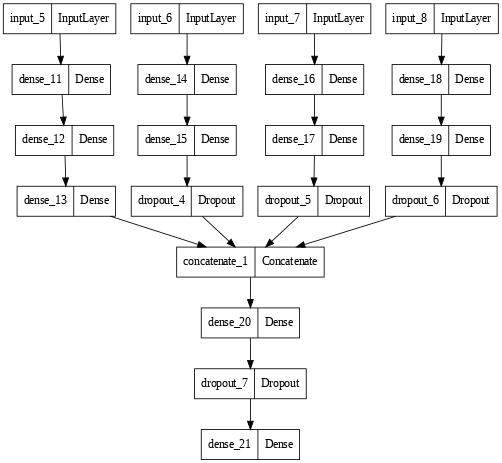

In [ ]:
utils.plot_model(model_final, dpi=60)

In [ ]:
model_final.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 11)]         0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 3000)]       0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 3000)]       0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 3000)]       0           []                               
                                                                                            

In [129]:
custum_metric = tfa.metrics.F1Score(num_classes=3, average="micro", threshold=0.5, name='F1Score' )

In [ ]:
model_final.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=[custum_metric])

history = model_final.fit([x_train_age_01, x_train_prof_01, x_train_harm_01, x_train_MKB_01], 
                           y_train,
                           shuffle=True,
                           batch_size=32, 
                           epochs=5, 
                           validation_split=0.25,
                           verbose=1)

# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(history.history['loss'], 
         label='Значение ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2) 
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(history.history['F1Score'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_F1Score'], 
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей 
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

Epoch 1/5
37/37 [==============================] - 24s 567ms/step - loss: 0.1563 - F1Score: 0.9349 - val_loss: 0.2735 - val_F1Score: 0.9262
Epoch 2/5
37/37 [==============================] - 22s 585ms/step - loss: 0.1576 - F1Score: 0.9387 - val_loss: 0.2747 - val_F1Score: 0.9248
Epoch 3/5
37/37 [==============================] - 20s 544ms/step - loss: 0.1542 - F1Score: 0.9323 - val_loss: 0.2768 - val_F1Score: 0.9237
Epoch 4/5
37/37 [==============================] - 22s 599ms/step - loss: 0.1551 - F1Score: 0.9408 - val_loss: 0.2806 - val_F1Score: 0.9248
Epoch 5/5
29/37 [======================>.......] - ETA: 4s - loss: 0.1534 - F1Score: 0.9356

In [113]:
# Функция оценки результатов и вывода оценки

def eval_net(model, x_train, y_train, y_scaler = None, n = 100, limit = 1000.):
  
    pred = model.predict(x_train)             # Предсказание на тренировочной выборке
    if y_scaler:                              # Если есть нормирование - то денормировать
        pred = y_scaler.inverse_transform(pred)

    print('Средняя абсолютная ошибка:', mean_absolute_error(pred, y_train), '\n')

    for i in range(n):
        print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(y_train[i, 0],
                                                                                                    pred[i, 0],
                                                                                                    abs(y_train[i, 0] - pred[i, 0])))
    # Построение картинки разброса предсказанных и верных значений зарплаты
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(y_train, pred)                 # Отрисовка точечного графика
    ax.set_xlim(0, limit)                     # Пределы по x, y
    ax.set_ylim(0, limit)
    ax.plot(plt.xlim(), plt.ylim(), 'r')      # Отрисовка диагональной линии
    plt.xlabel('Правильные значения')
    plt.ylabel('Предсказания')
    plt.grid()
    plt.show()        

50/50 [==============================] - 5s 77ms/step
Средняя абсолютная ошибка: 0.06838884 

Реальное значение:   0.00  Предсказанное значение:   0.00  Разница:   0.00
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.03  Разница:   0.03
Реальное значение:   0.00  Предсказанное значение:   0.02  Разница:   0.02
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01
Реальное значение:   0.00  Предсказанное значение:   0.01  Разница:   0.01


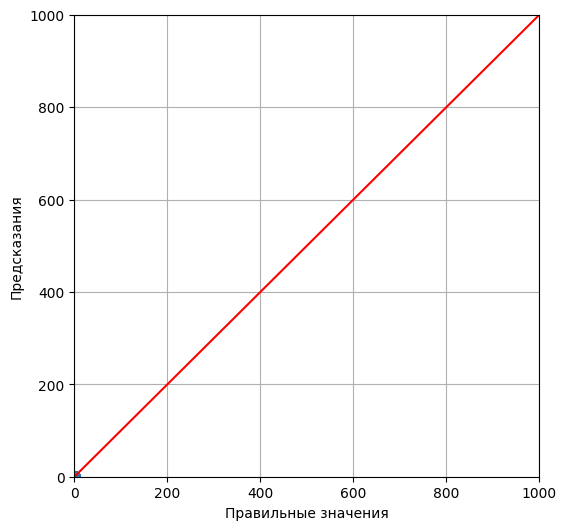

In [115]:
eval_net(model_final, [x_train_age_01, x_train_prof_01, x_train_harm_01, x_train_MKB_01], 
                           y_train)